In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import gpflow as gpf
import tests
from mogp import *

In [2]:
def plot_model(m, data, lower=-8.0, upper=8.0):
    X,Y = data
    pX = np.linspace(lower, upper, 100)[:, None]
    pY, pYv = m.predict_y(pX)
    if pY.ndim == 3:
        pY = pY[:, 0, :]
    plt.plot(X, Y, "x")
    plt.gca().set_prop_cycle(None)
    plt.plot(pX, pY)
    for i in range(pY.shape[1]):
        top = pY[:, i] + 2.0 * pYv[:, i] ** 0.5
        bot = pY[:, i] - 2.0 * pYv[:, i] ** 0.5
        plt.fill_between(pX[:, 0], top, bot, alpha=0.3)
    plt.xlabel("X")
    plt.ylabel("f")
    plt.title(f"ELBO: {m.elbo(data):.3}")


### Lorenz Attractor as a test case for MOGP

((1185, 1), (1185, 3))

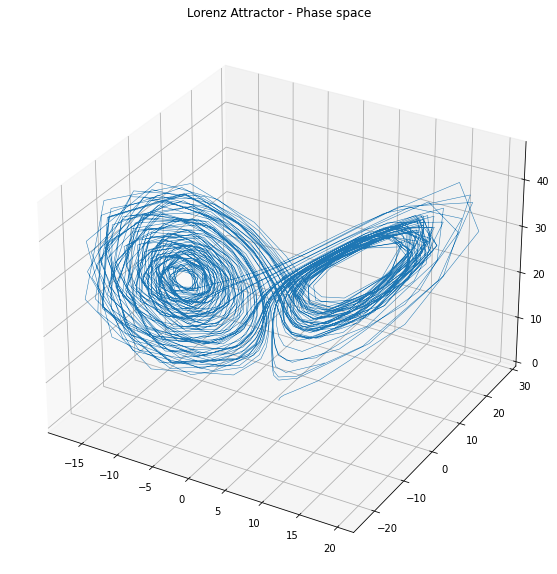

In [3]:
data = tests.lorenz_test()
data[0].shape , data[1].shape

### Test the wrapper interface

#### Abstract MOGP class

In [4]:
mogp = MOGP(data)
assert mogp.nsamples == 1185 
assert mogp.nxdims == 2
assert mogp.nydims == 2
assert mogp.nparams == 3


#### Intrinsic Coregionalization Model

(50,)


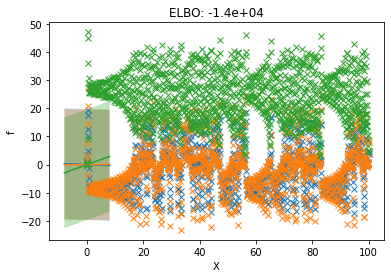

In [14]:
icm = ICM(data,20)
assert icm.nsamples == 1185 
assert icm.nxdims == 2
assert icm.nydims == 2
assert icm.nparams == 3
assert icm.kernels.num_latent_gps == 3
t_test = np.linspace(0,50,50)
print(t_test.shape)
mean,var = icm.predict(t_test)
plot_model(icm.model,data)

#### Semi-parametric Latent Factor Model

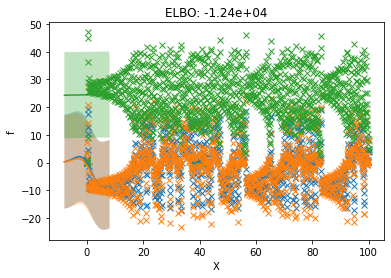

In [15]:
slfm = SLFM(data,20)
mean,var = slfm.predict(t_test)
plot_model(slfm.model,data)

#### Linear Congruential Model

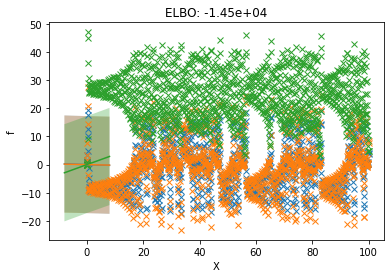

In [17]:
lcm = LCM(data,10,10)
mean,var = lcm.predict(t_test)
plot_model(lcm.model,data)

#### Lorenz Attractor might need more tuning, so let's check correctness with Vanilla data 

In [9]:
data_v = tests.vanilla_test()
data_v[0].shape, data_v[1].shape

((100, 1), (100, 3))

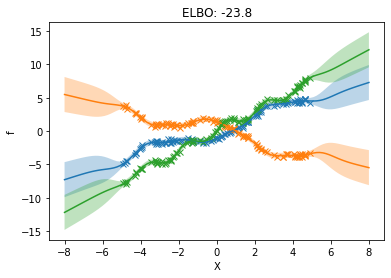

In [10]:
# ICM
icm = ICM(data_v,15)
xtest = np.linspace(-6,6,100).reshape(-1,1)
icm.predict(xtest);
plot_model(icm.model,data_v)

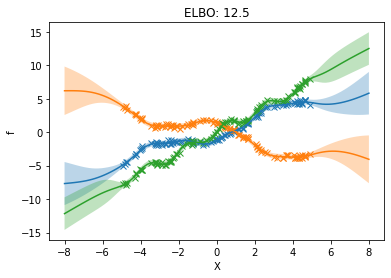

In [13]:
# LCM 
lcm = LCM(data_v,15,4)
xtest = np.linspace(-6,6,100).reshape(-1,1)
lcm.predict(xtest);
plot_model(lcm.model,data_v)

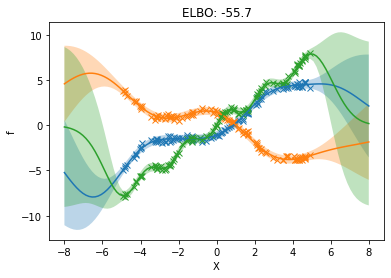

In [12]:
# SLFM 

slfm = SLFM(data_v,15)
xtest = np.linspace(-6,6,100).reshape(-1,1)
slfm.predict(xtest);
plot_model(slfm.model,data_v)